<a href="https://colab.research.google.com/github/ikukang/MLwithPython/blob/master/3_4_classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 사용 상의 편의를 위한 Initial Setting 

# 실행결과를 한 창에 표시
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# numpy 소숫점 setting
import numpy as np
np.set_printoptions(precision=7)

# pandas이용하여 grid display
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)          # 최대 표시 줄 수 제한 해제
pd.set_option('display.max_columns', None)       # 최대 표시 컬럼 수 제한 해제
pd.set_option('display.max_colwidth', -1)        # 컬럼내 데이터 표시 제한 해제

# Warning Message hide
import warnings
warnings.filterwarnings('ignore')

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [3]:
from keras.datasets import imdb

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
train_data.shape
print('\n')
train_label.shape
print('\n')
test_data.shape
print('\n')
test_label.shape

(25000,)

(25000,)

(25000,)

(25000,)

In [5]:
print(train_data[0])
print(train_label[0])
print(train_data)
print(train_label)
print(len(train_data))
print(len(train_label))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4

## Binary Classification
IMDB는 인터넷 영화 Database 로 부터 가져온 양 극단의 리뷰 50000개로 이루어진 Database 입니다

Train Data : 25,000개, Test Data : 25,000개

각각 50%는 긍정, 50%는 부정 리뷰 임

데이터는 다음과 같이 전 처리 되어 있음

(1) 각 리뷰의 단어가 이에 대응하는 숫자로 변환되어 있음

(2) Train/Test Label은 긍정(1) 과 부정(0) 으로 구분되어 있음

In [6]:
print(max([max(sequence) for sequence in train_data]))
print(max([max(sequence) for sequence in test_data]))

9999
9999


In [7]:
word_index = imdb.get_word_index()
# word_index는 개별 단어와 이 단어에 해당하는 숫자를 맵핑해 놓은 Dictionary 임

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# word_index는 ''단어:숫자" 의 Dictionary 이나, 이를 "숫자:단어" 순으로 순서를 뒤집음

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
# for 문을 돌면서 train_data[0]를 구성하는 각 숫자를 이에 맵핑하는 단어로 치환하여 문자열을 구성 함
# 이때 0, 1, 2는 사전 정의된 값(index) 이므로, 해당 갯수(3) 만큼 빼고 치환을 진행
# 가장 자주 등장하는 단어 10,000개 로 제한하였으므로, 이에 해당되지 않는 key(숫자)는 '?' 로 display 됨

1646592/1641221 [==============================] - 1s 0us/step


In [8]:
print(len(word_index))
print(len(reverse_word_index))

88584
88584


In [9]:
print(decoded_review)
print(train_label[1])

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
0


In [0]:
import numpy as np

# 전처리 하여 숫자만으로 구성된 리스트를 신경망에 바로 주입 할 수 없으므로, 
# (1) 이를 Matrix(2차원 텐서)로 변환
# (2) 각 row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당 (row, column)의 0 값 -> 1 로 변경
def zero_matrix(rows, dimension=10000):
    results = np.zeros((len(rows), dimension))    # Matrix(2차원 텐서)로 변환
    
    for i, col in enumerate(rows):
            results[i, col] = 1.                                       
            #각  row(숫자로 구성되어 있는 전처리된 리뷰)의 개별 숫자값을 column 값으로 하여, 해당  (row, column)의 0 값 -> 1 로 변경    

    return results

# train_data를 matrix로 변환
x_train = zero_matrix(train_data)

#  test_data를 matrix로 변환
x_test = zero_matrix(test_data)

In [11]:
print(x_train)
print(x_train.shape)

print(x_test)
print(x_test.shape)


[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(25000, 10000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
(25000, 10000)


In [12]:
# train, test data 확인 
# 각 row 별로 column의 길이가 달랐으나, 각 row 마다 10,000개 컬럼으로 일치화
# 해당  column값에 해당하는 column의 0값 -> 1로 변경 (즉, [2, 34, ....10] -> 2번째 컬럼 1, 34번째 컬럼 1 등으로 변경 함)

#  결과적으로 10000개 단어로 한정하였으므로, column 값은 0 ~9999 이고, 각 row 별 10,000개 column으로 정규화 한 후
# column 값에 해당하는 해당 번째 column을 1로 Set

print(x_train[0])
print(x_train[0].shape)
print(x_test[0])
print(x_test[1].shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)
[0. 1. 1. ... 0. 0. 0.]
(10000,)


In [13]:
# train_label, test_label 을 data type이 float(부동소수점 수)인 1차원 행렬(vector)로 변환
# 각각 25000개의 영화리뷰 결과 (부정 : 0,  긍정 : 1)

y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

y_train
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [14]:
# 결과적으로,

# x_train data와 x_test data는 각각 25000개의 row로 이루어진 data이고
# 각 row는 '0'과 '1' 로 이루어진 10000개의 column으로 이루어진 data 임
print(x_train.shape)
print(x_test.shape)

# x_train label과 x_test label은 각각 25000개의 영화리뷰 결과 (부정 : 0,  긍정 : 1) 로 이루어진 Data 임
print(y_train.shape)
print(y_test.shape)

(25000, 10000)
(25000, 10000)
(25000,)
(25000,)


In [15]:
from keras import models
from keras import layers

# 앞서와 마찬가지로 선형적으로 쌓는 Sequential 모델을 이용
model = models.Sequential()

# 입력층 : 입력 parameter는 10000이고, 출력 parameter는 16 임, 활성화 함수는 relu
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# 은닉층 : 입력 parameter는 16이고, 출력 parameter는 16 임, 활성화 함수는 relu
model.add(layers.Dense(16, activation='relu'))

# 출력층 : 입력 parameter는 16이고, 출력 parameter는 1 임, 활성화 함수는 sigmoid
# 주로 Binary Classification의 경우는 'Sigmoid', Multi-Classification의 경우는 'Softmax' 활성화 함수 이용
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
# compile method를 이용하여 학습 과정을 구성
# 옵티마이저는 Adam을 사용하고, Binary Classification 이므로 손실함수는 'binary_crossentropy'를 사용

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# 전체 25000 set의 Data에서 검증 Data로 10000 set 을 추출
#  즉 x_train               : 5000 set
#       partial_x_train : 15000 set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
# fit method를 이용해서 정해진 epoch 만큼  Training을 수행
# 이때 Training Data(partial_x_train)과 Validation Data(x_val)을 주입하고, epoch, batch size 지정

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 10s 694us/step - loss: 0.5437 - acc: 0.7707 - val_loss: 0.3854 - val_acc: 0.8620
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2823 - acc: 0.9083 - val_loss: 0.2894 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.1913 - acc: 0.9383 - val_loss: 0.2809 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1418 - acc: 0.9559 - val_loss: 0.2843 - val_acc: 0.8862
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1074 - acc: 0.9711 - val_loss: 0.3000 - val_acc: 0.8825
Epoch 6/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.0818 - acc: 0.9812 - val_loss: 0.3215 - val_acc: 0.8802
Epoch 7/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.0616 - acc: 0.9877 - val_loss: 0.3482

In [19]:
model.summary()

#  dense_10 layer의 전체 paramenter의 수는 10000(입력) * 16(출력) + 16 = 160,016 임 (추가적으로 더하는 16은 bias)
#  dense_11 layer의 전체 paramenter의 수는 16 * 16 + 16 = 272 임 (추가적으로 더하는 16은 bias)
#  dense_3 layer의 전체 paramenter의 수는 16 * 1 + 1 = 17 임 (추가적으로 더하는 1은 bias)
# 그러므로 총 paramter의 수는 160,016 + 272 + 17 = 160,305

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Training 시 생성된 정보를 저장하고 있는 history method를 이용하여 모든 val_loss, val_accuracy, loss, accuracy를 확인
history_dict = history.history
print(history_dict.keys())
print(history_dict.values())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
dict_values([[0.38537289109230044, 0.28939748454093933, 0.28086145186424255, 0.28433129010200503, 0.30002210445404054, 0.321493896150589, 0.34818067688941956, 0.37770281705856323, 0.4039424485206604, 0.4318892566680908, 0.4584547972679138, 0.48427583327293394, 0.5036822869300842, 0.5249564285755157, 0.5432748609066009, 0.5620765357971191, 0.5791189262390136, 0.5945897601127624, 0.6090838184356689, 0.6221179304122925], [0.8620000007629395, 0.8875000003814697, 0.8882000002861022, 0.8862000000953675, 0.8825000002861023, 0.8802000001907349, 0.8801000001907349, 0.8773999999046326, 0.8757, 0.8740999998092651, 0.8737, 0.8718999999046325, 0.8704999997138977, 0.8699999996185303, 0.8687999997138977, 0.8684999996185303, 0.8684999997138977, 0.8670999997138977, 0.8664999997138977, 0.8663999997138977], [0.5437356829484303, 0.2822978230794271, 0.19129628887176514, 0.14177413090070087, 0.10738368665377299, 0.08181334253549576, 0.06160060587326686, 0.04

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

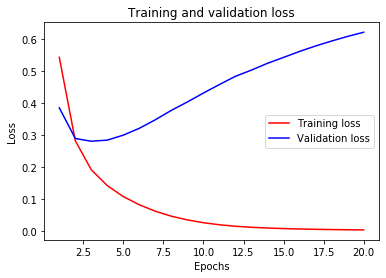

In [21]:
# Training & Validation Loss Graph
import matplotlib.pyplot as plt

plt.clf()   # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

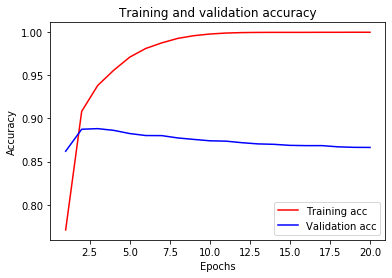

In [22]:
# Training & Validation Accuracy Graph
plt.clf()   # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
# 과적합 시점을(epoch 3 이후) 알았으니, 앞에서와 동일하게 처음부터 다시 Network를 구성
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


# fit method로 Training 시, epoch = 4로 Setting 하여 과적합 방지
model.fit(x_train, y_train, epochs=4, batch_size=512)

# evaluate method를 이용하여 입력 test data에 대한 loss, accuracy를 계산
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.5278 - acc: 0.7835
Epoch 2/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.2794 - acc: 0.9030
Epoch 3/4
25000/25000 [==============================] - 1s 46us/step - loss: 0.2035 - acc: 0.9284
Epoch 4/4
25000/25000 [==============================] - 1s 47us/step - loss: 0.1634 - acc: 0.9444


25000/25000 [==============================] - 2s 75us/step


In [24]:
# 약 88%의 정확도로 Movie Review를 정확하게 예측 함을 할 수 있음

print('test_acc : ', accuracy)
print('test_loss : ', loss)

test_acc :  0.87968
test_loss :  0.30301755895614624
